# import packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [ ]:
# load data
data=pd.read_csv("/content/waze_dataset.csv")

In [ ]:
data.shape # (number of rows , number of columns)

(14999, 13)

In [ ]:
data.head() # show first 5 rows

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [ ]:
data.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [ ]:
data.isnull().sum()

,0
ID,0
label,700
sessions,0
drives,0
total_sessions,0
n_days_after_onboarding,0
total_navigations_fav1,0
total_navigations_fav2,0
driven_km_drives,0
duration_minutes_drives,0


In [ ]:
data=data.drop_duplicates()

In [ ]:
data.shape

(14999, 13)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(14299, 13)

In [ ]:
data.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [ ]:
# remove columns unnecessary
data.drop(["ID","total_navigations_fav2","drives","driving_days"],axis=1,inplace=True)

In [ ]:
data.head()

,label,sessions,total_sessions,n_days_after_onboarding,total_navigations_fav1,driven_km_drives,duration_minutes_drives,activity_days,device
0,retained,283,296.748273,2276,208,2628.845068,1985.775061,28,Android
1,retained,133,326.896596,1225,19,13715.920550,3160.472914,13,iPhone
2,retained,114,135.522926,2651,0,3059.148818,1610.735904,14,Android
3,retained,49,67.589221,15,322,913.591123,587.196542,7,iPhone
4,retained,84,168.247020,1562,166,3950.202008,1219.555924,27,Android


In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["device"]=le.fit_transform(data["device"])

In [ ]:
data.head()

,label,sessions,total_sessions,n_days_after_onboarding,total_navigations_fav1,driven_km_drives,duration_minutes_drives,activity_days,device
0,retained,283,296.748273,2276,208,2628.845068,1985.775061,28,0
1,retained,133,326.896596,1225,19,13715.920550,3160.472914,13,1
2,retained,114,135.522926,2651,0,3059.148818,1610.735904,14,0
3,retained,49,67.589221,15,322,913.591123,587.196542,7,1
4,retained,84,168.247020,1562,166,3950.202008,1219.555924,27,0


In [ ]:
data["label"].value_counts()

,count
label,
retained,11763
churned,2536


In [ ]:
data["device"].value_counts()

,count
device,
1,9225
0,5074


In [ ]:
data.label = [1 if each == "churned" else 0 for each in data.label]

In [ ]:
data.head()

,label,sessions,total_sessions,n_days_after_onboarding,total_navigations_fav1,driven_km_drives,duration_minutes_drives,activity_days,device
0,0,283,296.748273,2276,208,2628.845068,1985.775061,28,0
1,0,133,326.896596,1225,19,13715.920550,3160.472914,13,1
2,0,114,135.522926,2651,0,3059.148818,1610.735904,14,0
3,0,49,67.589221,15,322,913.591123,587.196542,7,1
4,0,84,168.247020,1562,166,3950.202008,1219.555924,27,0


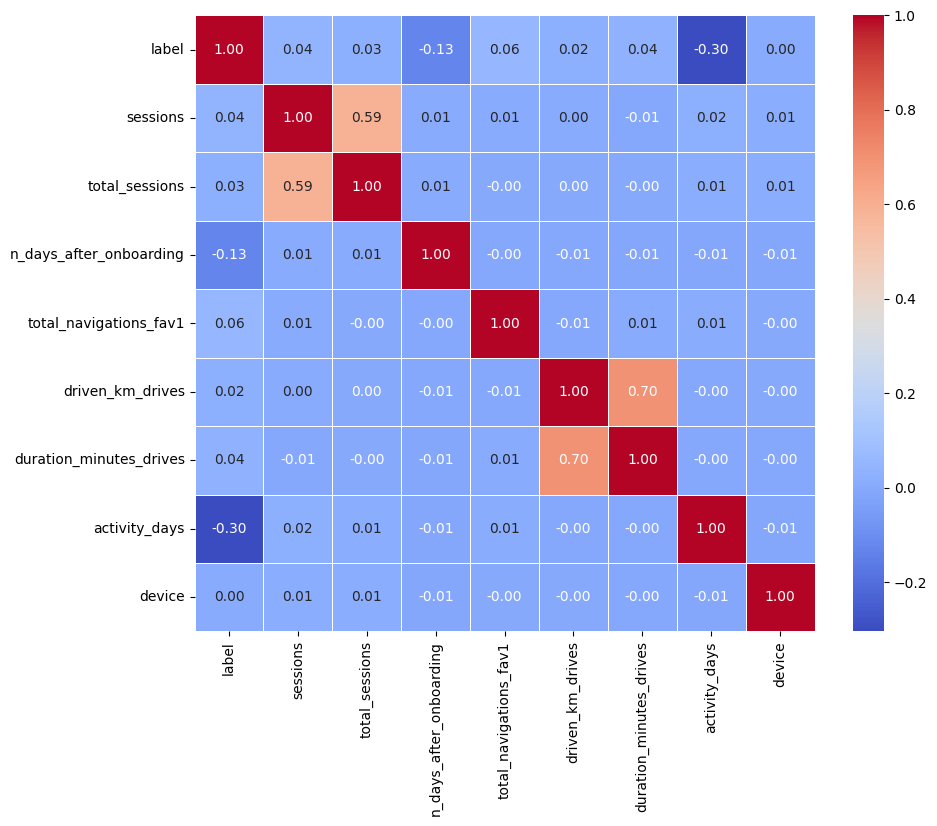

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr,annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

# Univariate	Analysis

In [ ]:
numerical_features=[column for column in data.columns if data[column].dtypes != "0"]

In [ ]:
numerical_features

['label',
 'sessions',
 'total_sessions',
 'n_days_after_onboarding',
 'total_navigations_fav1',
 'driven_km_drives',
 'duration_minutes_drives',
 'activity_days',
 'device']

In [ ]:
import seaborn as sns

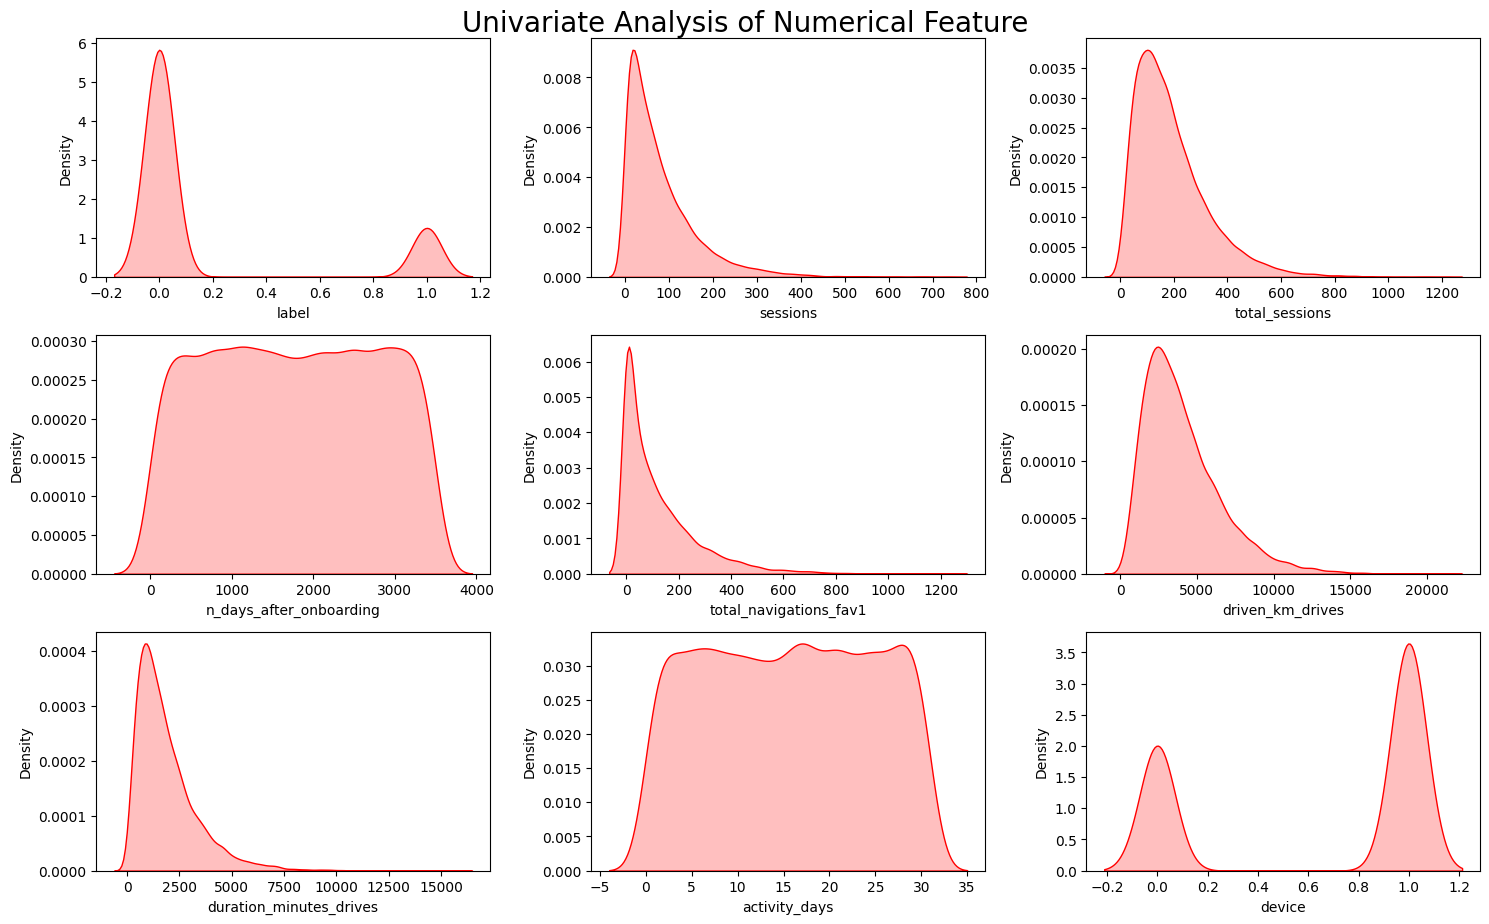

In [ ]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of Numerical Feature",fontsize=20,fontweight=20)
for i in range(0,len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=data[numerical_features[i]],shade=True,color="r")
    plt.xlabel(numerical_features[i])
    plt.tight_layout()


# Visualization	of	Target	Feature

<Axes: xlabel='label', ylabel='count'>

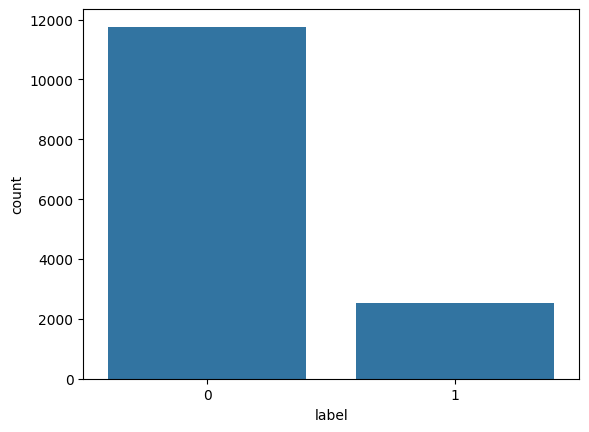

In [ ]:
sns.countplot(data,x=data['label'])

from the graph data is imbalance


# Checking	the	outliers	of	the	target

<Axes: ylabel='label'>

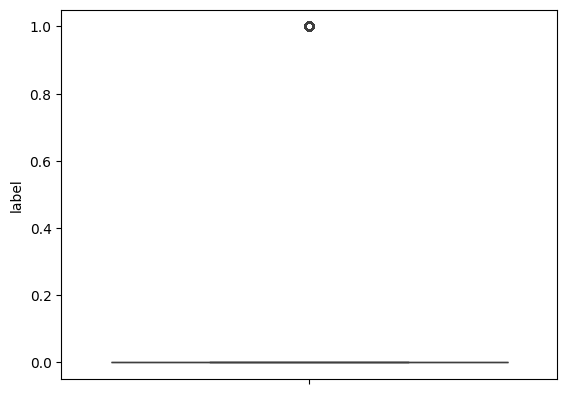

In [ ]:
sns.boxplot(data["label"])

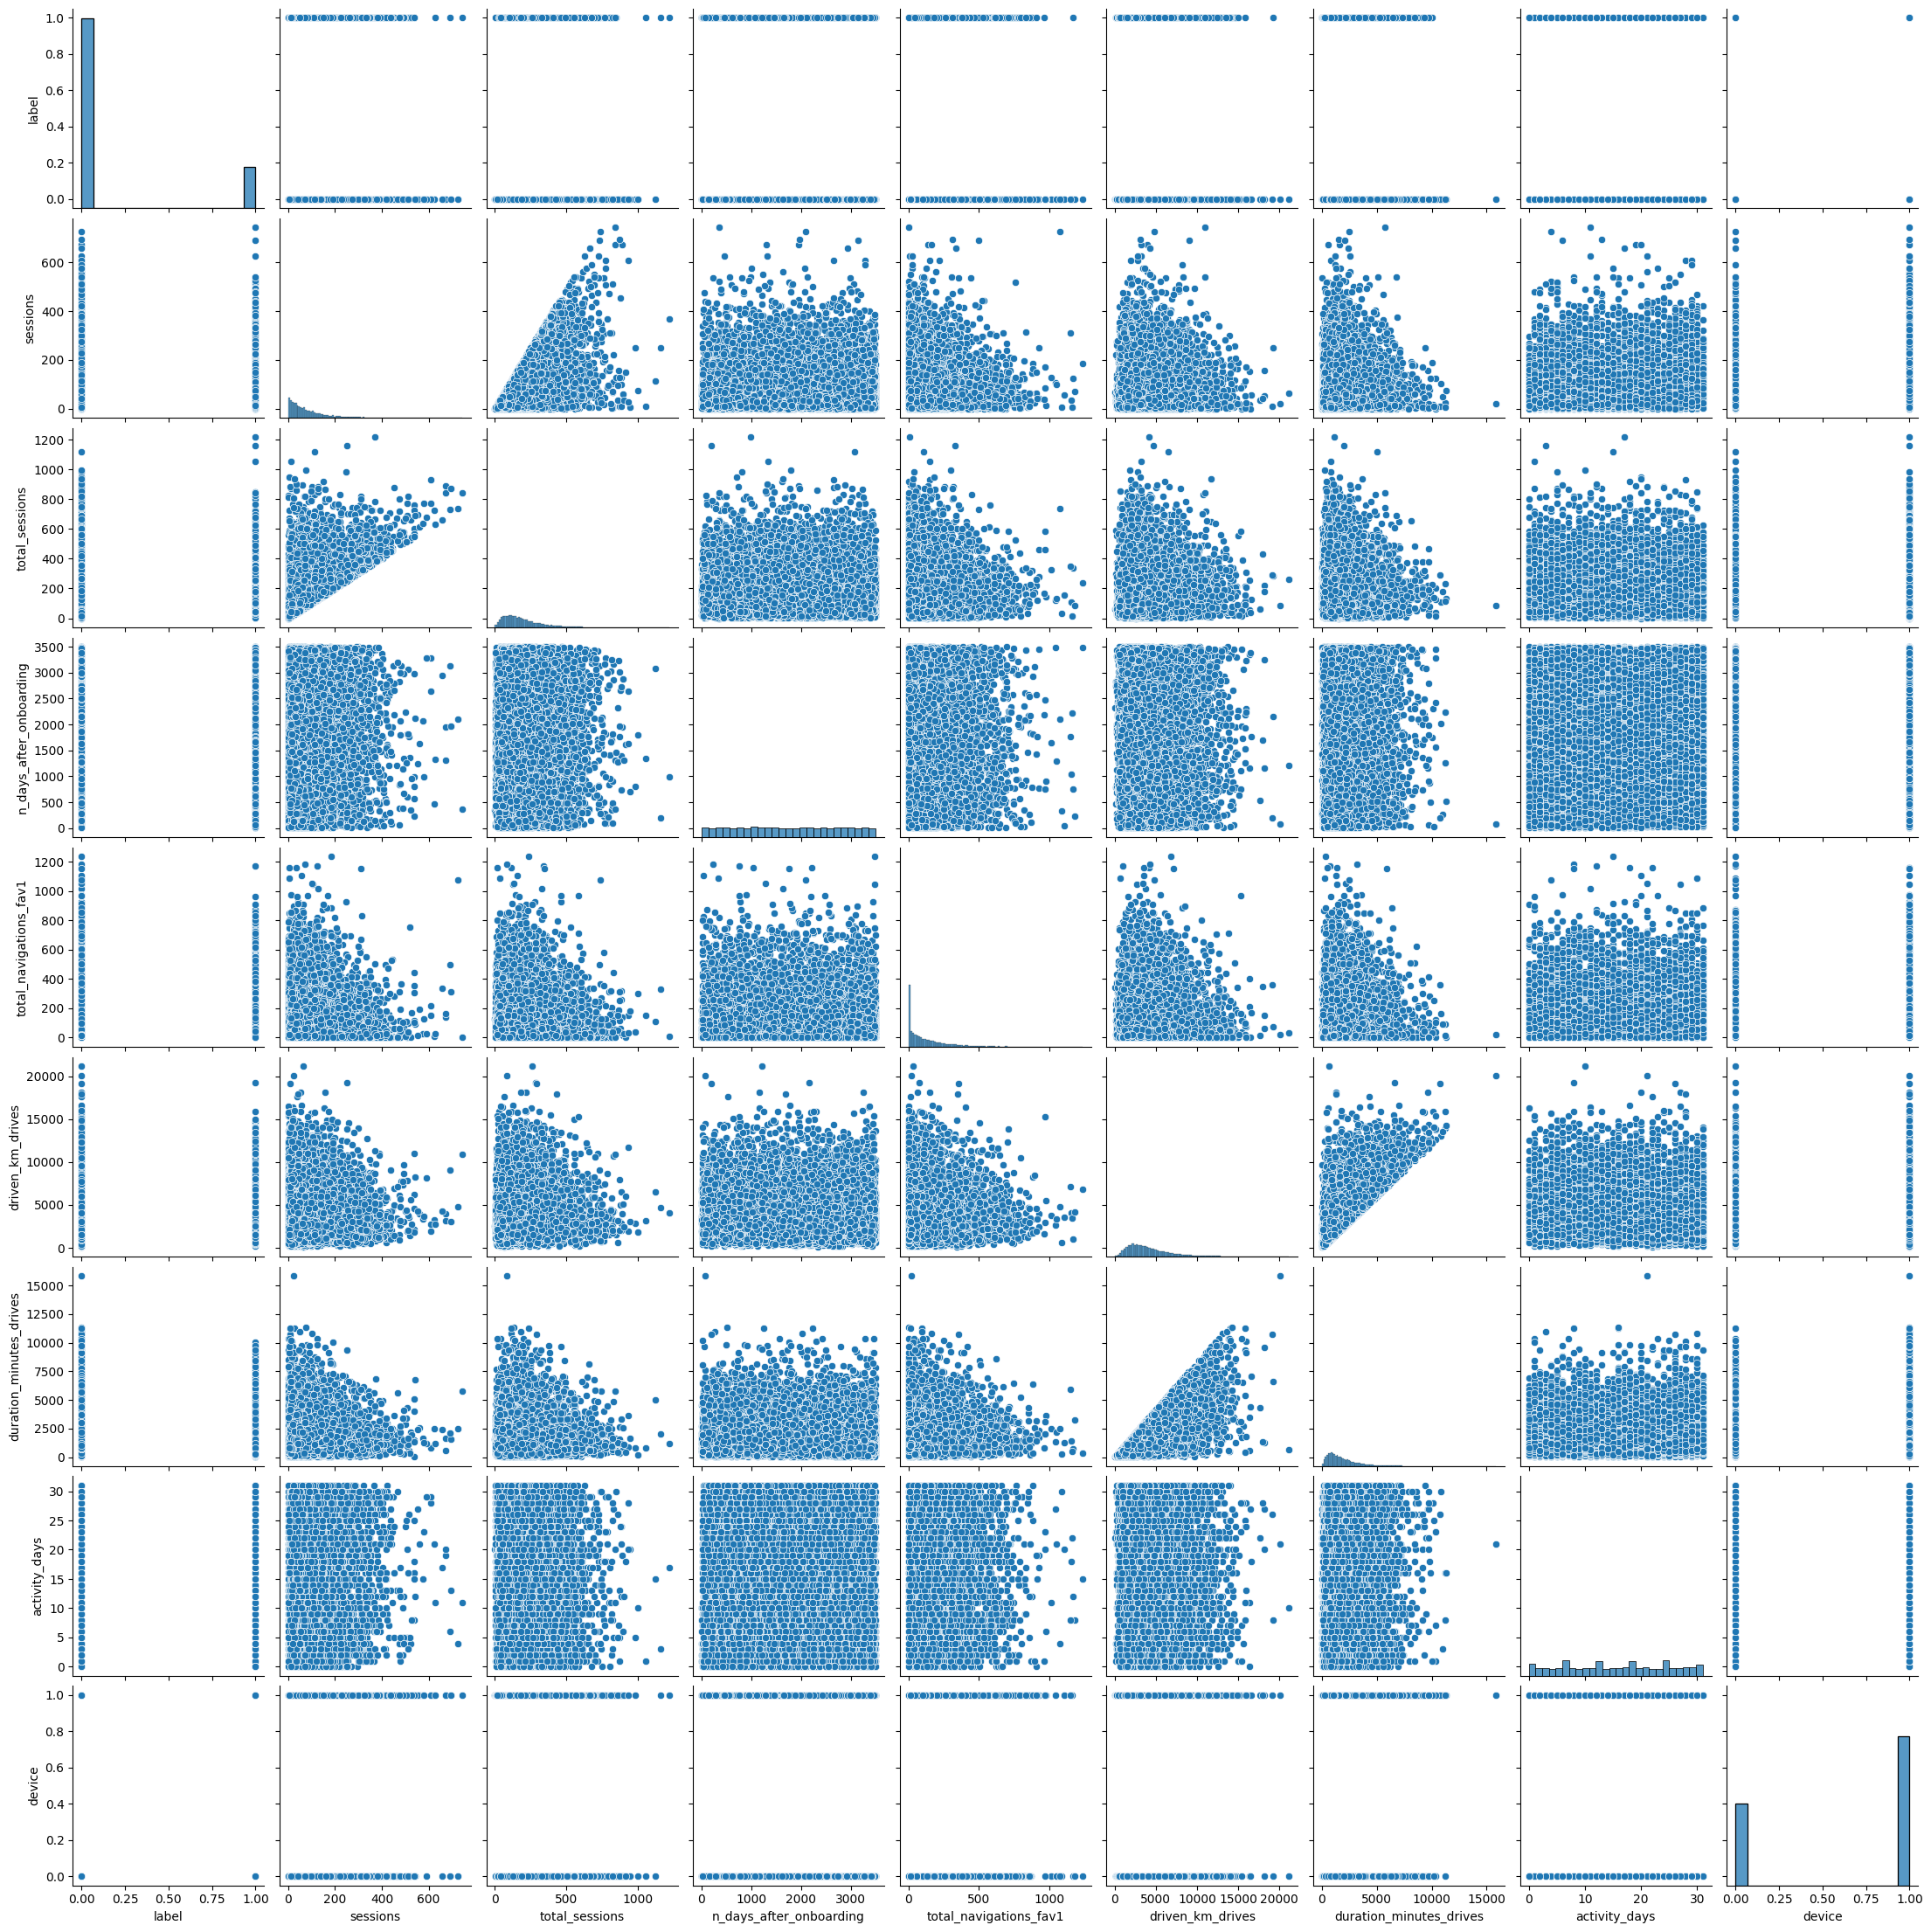

In [ ]:
sns.pairplot(data)
plt.show()


<Axes: xlabel='label', ylabel='driven_km_drives'>

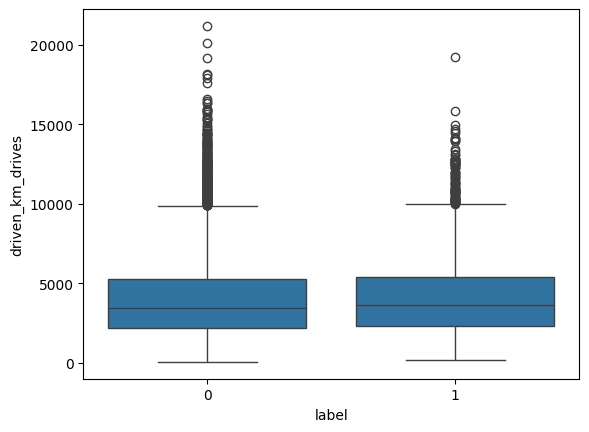

In [ ]:
sns.boxplot(x	='label',	y	='driven_km_drives',	data	=	data)

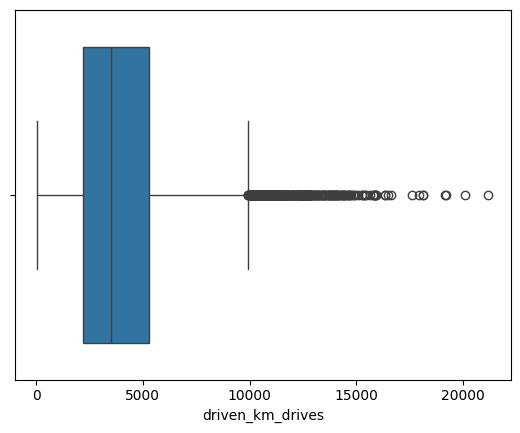

In [ ]:
sns.boxplot(x=data['driven_km_drives'])
plt.show()

In [ ]:
data.columns

Index(['label', 'sessions', 'total_sessions', 'n_days_after_onboarding',
       'total_navigations_fav1', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'device'],
      dtype='object')

In [ ]:
data.drop(["total_sessions"],axis=1,inplace=True)

In [ ]:
data.head()

,label,sessions,n_days_after_onboarding,total_navigations_fav1,driven_km_drives,duration_minutes_drives,activity_days,device
0,0,283,2276,208,2628.845068,1985.775061,28,0
1,0,133,1225,19,13715.920550,3160.472914,13,1
2,0,114,2651,0,3059.148818,1610.735904,14,0
3,0,49,15,322,913.591123,587.196542,7,1
4,0,84,1562,166,3950.202008,1219.555924,27,0


In [ ]:
y=data["label"]

In [ ]:
x=data.drop(["label"],axis=1)

In [ ]:
data.shape

(14299, 8)

In [ ]:
print(x.shape)
print(y.shape)

(14299, 7)
(14299,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
data.shape

(14299, 8)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(11439, 7)
(2860, 7)
(11439,)
(2860,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()


In [ ]:
x_train=scalar.fit_transform(x_train)

In [ ]:
x_test=scalar.transform(x_test)

In [ ]:
import joblib

# Save the model, scaler, and PCA objects
joblib.dump(scalar, 'scaler.pkl')


['scaler.pkl']

In [ ]:
x_train

array([[ 1.24045808,  0.12946479,  3.48643762, ..., -0.17603793,
        -0.0621763 ,  0.73624714],
       [-0.76493216,  0.79568675,  0.33564165, ...,  0.23078213,
        -1.61170712,  0.73624714],
       [ 5.60802579, -0.9325129 , -0.04544815, ..., -0.3696446 ,
         1.04463144,  0.73624714],
       ...,
       [ 1.64645734,  1.19641429, -0.41973276, ..., -0.43643804,
         0.93395066,  0.73624714],
       [-0.64190208, -1.10752046, -0.82804326, ...,  0.28600686,
         0.71258912, -1.35823957],
       [ 1.59724531,  0.1523351 ,  0.06343465, ..., -1.13046624,
        -0.0621763 , -1.35823957]])

In [ ]:
x_test

array([[ 2.69221298,  1.01643493, -0.30404479, ...,  0.99272286,
        -0.17285707,  0.73624714],
       [-0.93717427, -1.19900168, -0.22238269, ..., -0.84044976,
         1.26599298,  0.73624714],
       [-0.67881111,  0.65846492, -0.33126549, ..., -0.09779543,
         1.26599298,  0.73624714],
       ...,
       [-0.64190208,  1.15663985,  1.00254879, ..., -0.90474602,
         1.5980353 , -1.35823957],
       [-0.87565923,  1.70254411,  0.3220313 , ..., -0.08393679,
         0.26986602,  0.73624714],
       [-0.59269005, -1.24673102, -0.15433094, ...,  0.94912693,
        -1.16898403,  0.73624714]])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance, you can adjust this
x_pca = pca.fit_transform(x_train)

In [ ]:
joblib.dump(pca, 'pca.pkl')

['pca.pkl']

In [ ]:
principle_Df = pd.DataFrame(data =x_pca)

In [ ]:
print(principle_Df.head())

          0         1         2         3         4         5
0  0.105191  2.001851 -0.202164 -1.632610  2.573973  0.948608
1 -0.160921 -1.257768  0.741689  0.137090  1.524907 -0.062629
2 -0.994242  4.485606  2.013274  0.442912 -1.283370  2.777073
3 -1.241320  0.237956 -0.136550  0.611607  1.579208 -1.169418
4 -0.167837 -0.016194 -1.663539 -1.021591 -0.880466  0.049940


In [ ]:
print(principle_Df.shape)

(11439, 6)


In [ ]:
x_pca.shape

(11439, 6)

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter

# Check the original class distribution
print('Original training class distribution:', Counter(y_train))

# Create an instance of SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and resample the training data
x_res, y_res = smote.fit_resample(x_pca, y_train)

# Check the resampled class distribution
print('Resampled training class distribution:', Counter(y_res))

Original training class distribution: Counter({0: 9409, 1: 2030})
Resampled training class distribution: Counter({1: 9409, 0: 9409})


In [ ]:
# param_grid = {
#     'n_estimators': [25, 50, 100, 150],
#     'max_features': ['sqrt', 'log2', None],
#     'max_depth': [3, 6, 9],
#     'max_leaf_nodes': [3, 6, 9],
#     'class_weight': [{0: 1, 1: 5}]
# }

In [ ]:
x_res.shape

(18818, 6)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# RF_model=RandomForestClassifier()


from sklearn.naive_bayes import GaussianNB


NB_model = GaussianNB()

NB_model.fit(x_res,y_res)

GaussianNB()

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [150],
#     'max_depth': [6],
#     'max_features': ["log2"],
#      "max_leaf_nodes":[9],
#     #'class_weight': [{0: 5, 1: 6}]  # Adjust as needed
#  }

# grid_search = GridSearchCV(estimator=NB_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
# grid_search.fit(x_res, y_res)

# best_rf_model = grid_search.best_estimator_


In [ ]:
# best_rf_model

In [ ]:
joblib.dump(NB_model, 'NB_model.pkl')

['NB_model.pkl']

In [ ]:
# Apply the same PCA transformation on the test data
x_test_pca = pca.transform(x_test)

In [ ]:
y_pred=NB_model.predict(x_test_pca)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.65      0.76      2354
           1       0.30      0.72      0.43       506

    accuracy                           0.66      2860
   macro avg       0.61      0.68      0.59      2860
weighted avg       0.81      0.66      0.70      2860



In [ ]:
from sklearn.metrics import confusion_matrix

[[1529  825]
 [ 144  362]]


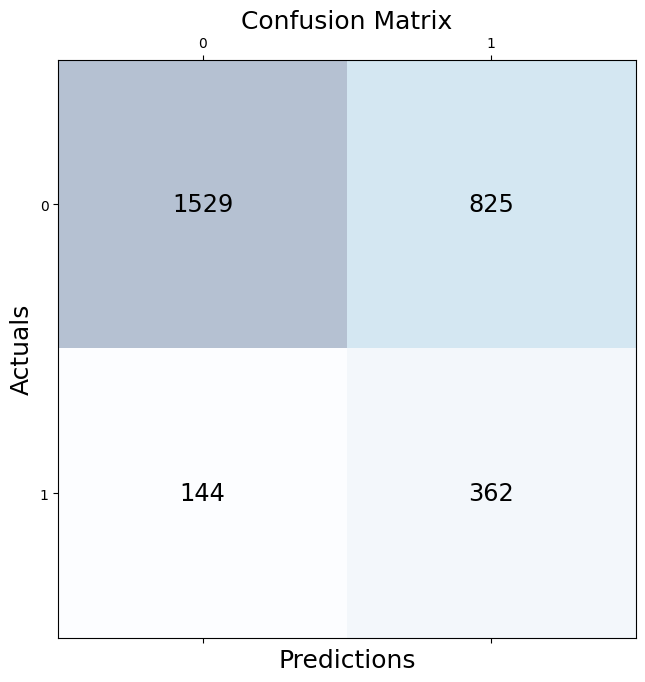

In [ ]:
print(confusion_matrix(y_test,y_pred))

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
from sklearn import metrics
accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'model Accuracy - : {100*accracy:.3} %')
print (f'model f1_score - : {100*f1_score:.3} %')
print (f'model precision - : {100*precision:.3} %')
print (f'model recall - : {100*recall:.3}  %')

model Accuracy - : 66.1 %
model f1_score - : 42.8 %
model precision - : 30.5 %
model recall - : 71.5  %


In [ ]:
x_test.shape

(2860, 7)

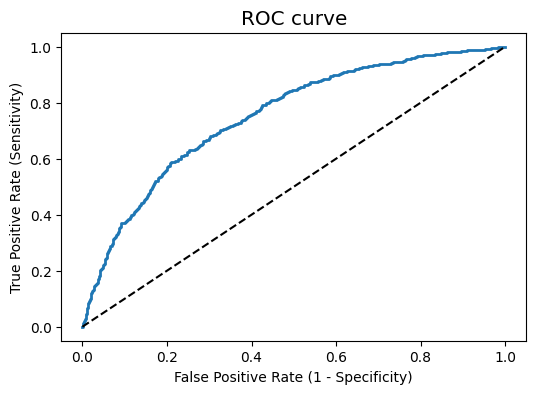

In [ ]:
# plot ROC Curve
y_pred1 = NB_model.predict_proba(x_test_pca)[::,1]

# y_pred1 = y_pred1.reshape(-1,1)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1) # , pos_label = 'Yes'

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7528


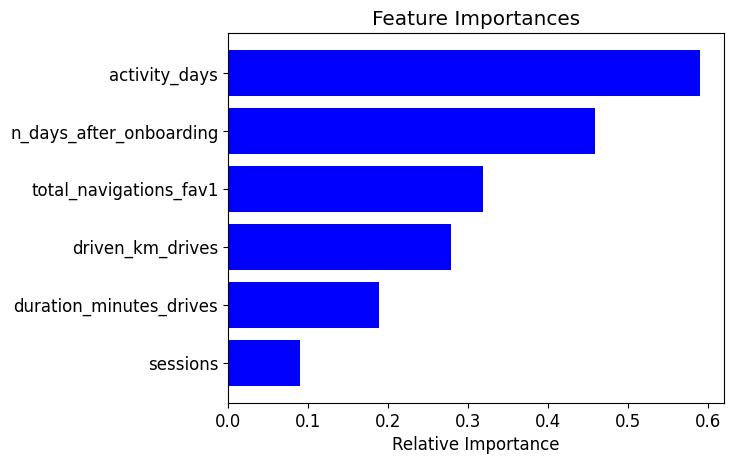

In [ ]:
features = x.columns

importances = np.abs(NB_model.theta_[1] - NB_model.theta_[0])
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()